# Question et Réponses

Je débute avec Langchain. J'essaie de réaliser un projet de Question  et Réponses avec langchain.

Pour le faire, il faudrait récupérer les données et les stocker. et selon  la question de l'utilisateur, questionnner cette base de données grâce à un LLM

# Installation des packages

In [ ]:
!pip install langchain

In [ ]:
!pip install langchain_google_genai

In [ ]:
! pip install langchain_chroma

  Using cached langchain_chroma-0.1.0-py3-none-any.whl (8.5 kB)
  Using cached chromadb-0.4.24-py3-none-any.whl (525 kB)
  Using cached fastapi-0.110.2-py3-none-any.whl (91 kB)
  Using cached chroma_hnswlib-0.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.4 MB)
  Using cached uvicorn-0.29.0-py3-none-any.whl (60 kB)
  Using cached posthog-3.5.0-py2.py3-none-any.whl (41 kB)
  Using cached pulsar_client-3.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)
  Using cached onnxruntime-1.17.3-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.8 MB)
  Using cached opentelemetry_api-1.24.0-py3-none-any.whl (60 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.24.0-py3-none-any.whl (18 kB)
  Using cached opentelemetry_instrumentation_fastapi-0.45b0-py3-none-any.whl (11 kB)
  Using cached opentelemetry_sdk-1.24.0-py3-none-any.whl (106 kB)
  Using cached PyPika-0.48.9-py2.py3-none-any.whl
  Using cached overrides-7.7.0-py3-none-any.whl 

In [ ]:
!pip install langchain_community

# Les variables d'environnement

In [ ]:
import getpass
import os

os.environ["GOOGLE_API_KEY"] = getpass.getpass()

··········


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro")

# Charger les données depuis le Web

Il s'agit ici de charger les données depuis un site web. Pour le faire, on utilisera l'objet **WebBaseLoader**

Il permettra de récupérer depuis les informations d'un site web.

J'utliserai ce [lien](https://fr.wikipedia.org/wiki/B%C3%A9nin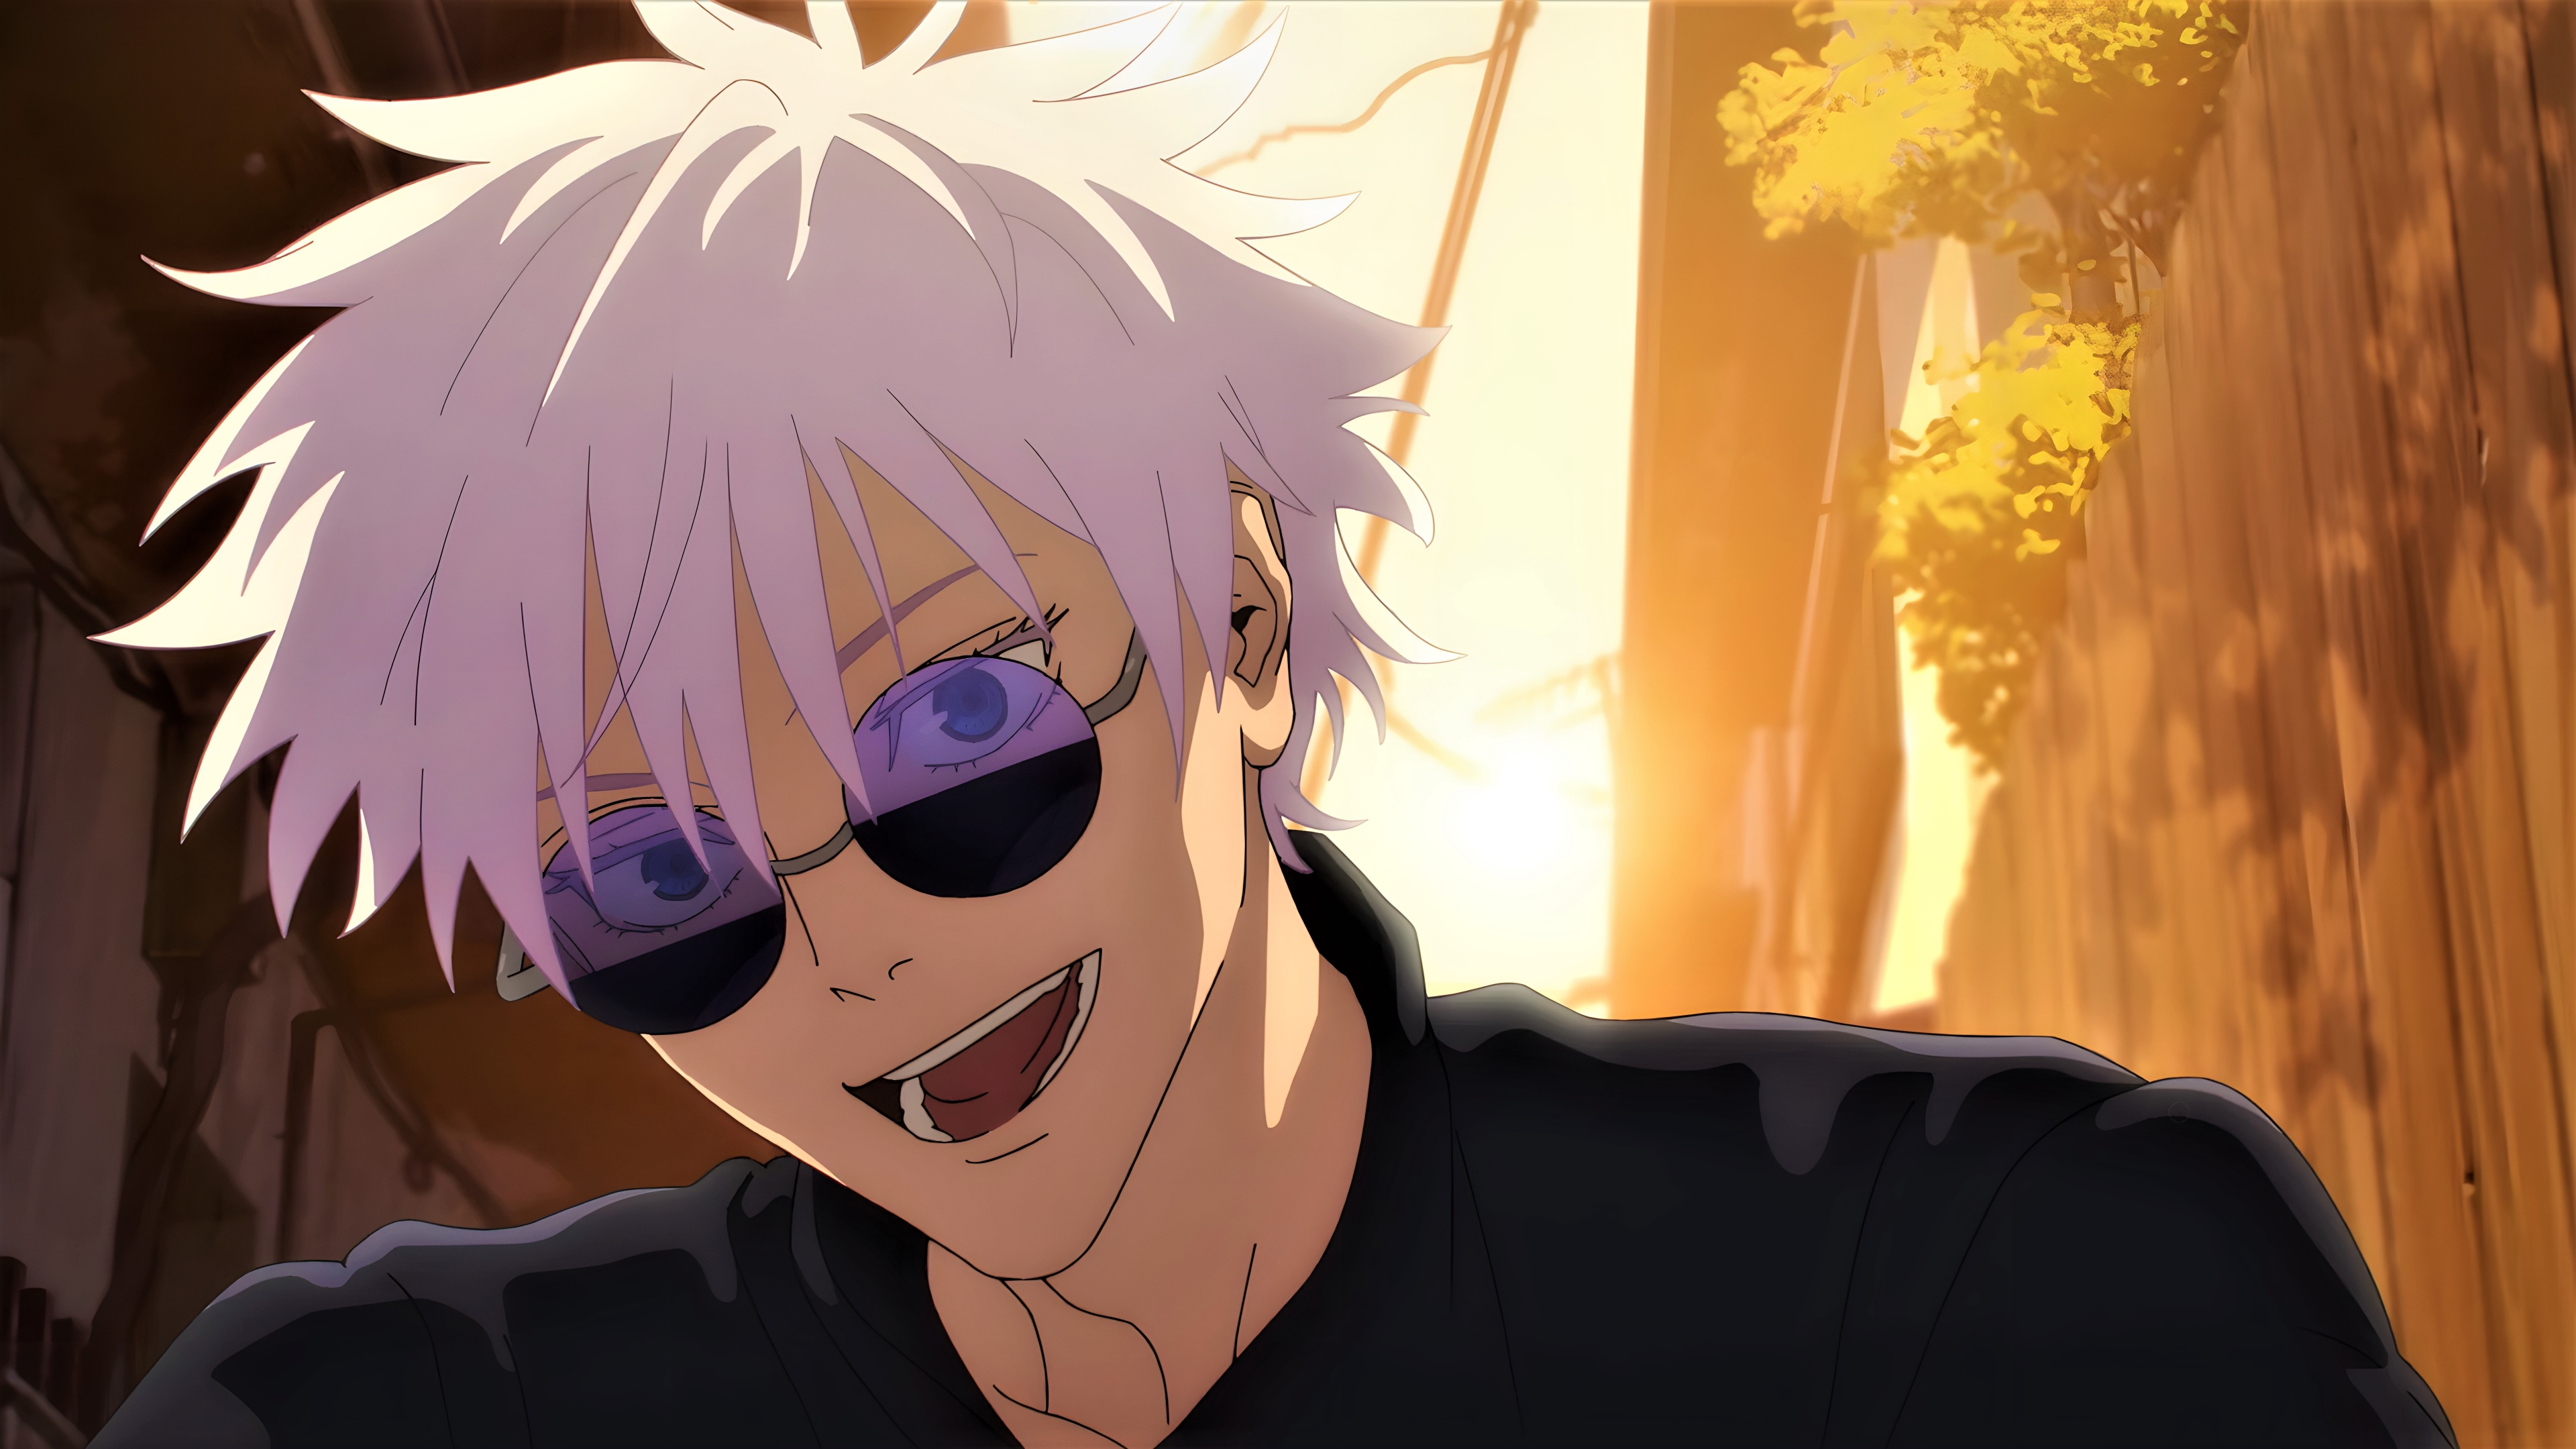)

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

In [ ]:
link_list=[
    'https://perspective.usherbrooke.ca/bilan/servlet/BMHistoriquePays/BEN',
    "https://fr.wikipedia.org/wiki/B%C3%A9nin",
    'https://fr.vikidia.org/wiki/B%C3%A9nin'
    ]

loader = WebBaseLoader(link_list)

In [ ]:
#Il arrive que des sites n'aient pas de certidficats SSL. Alors, pour outrepasser celà, on peut utiliser

loader.requests_kwargs = {'verify':False}

In [ ]:
data = loader.load()

data

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'perspective.usherbrooke.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.vikidia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


[Document(page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBénin  | Histoire du pays | Perspective Monde\n \n\n\n\n\n\n\n\n', metadata={'source': 'https://perspective.usherbrooke.ca/bilan/servlet/BMHistoriquePays/BEN', 'title': 'Bénin  | Histoire du pays | Perspective Monde', 'description': 'Informations historiques politiques sur Bénin ', 'language': 'fr'}),
 Document(page_content='\n\n\n\nBénin — Wikipédia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAller au contenu\n\n\n\n\n\n\n\nMenu principal\n\n\n\n\n\nMenu principal\ndéplacer vers la barre latérale\nmasquer\n\n\n\n\t\tNavigation\n\t\n\n\nAccueilPortails thématiquesArticle au hasardContact\n\n\n\n\n\n\t\tContribuer\n\t\n\n\nDébuter sur WikipédiaAideCommunautéModifications récentesFaire un don\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nRechercher\n\n\n\n\n\n\n\n\n\n\n\nRechercher\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCréer un compte\n\nSe connecter\n\n\n\n\n\n\

In [ ]:
len(data)


3

In [ ]:
data[0].page_content

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBénin  | Histoire du pays | Perspective Monde\n \n\n\n\n\n\n\n\n'

In [ ]:
data[0].metadata

{'source': 'https://perspective.usherbrooke.ca/bilan/servlet/BMHistoriquePays/BEN',
 'title': 'Bénin  | Histoire du pays | Perspective Monde',
 'description': 'Informations historiques politiques sur Bénin ',
 'language': 'fr'}

In [ ]:
len(data[2].page_content)

11734

# Découper les données

Les données étant chargées, il faut les découper en petit morceaux afin de faciliter leur vectorisation.

J'utiliserai l'objet **RecursiveCharacterTextSplitter** qui sépare les données suivant les séparateurs communs comme les retours à la ligne;les virgules;etc

In [ ]:
!pip install -qU langchain-text-splitters

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=500,
   length_function=len,
)

**Petite explication :**


1.   chunk_size:
Détermine le nombre de caractères qui se chevauchent entre des morceaux consécutifs lors du fractionnement du texte. Il spécifie la quantité du morceau précédent qui doit être incluse dans le morceau suivant.



2.   chunk_overlap: chunk_overlap : détermine le nombre de caractères qui se chevauchent entre des morceaux consécutifs lors du fractionnement du texte. Il spécifie la quantité du morceau précédent qui doit être incluse dans le morceau suivant. Par exemple, si chunk_overlap est défini sur 20 et chunk_size sur 100, le séparateur créera des morceaux de 100 caractères chacun, mais les 20 derniers caractères de chaque morceau se chevaucheront avec les 20 premiers caractères du morceau suivant. Cela permet une transition plus fluide entre les morceaux et garantit qu'aucune information n'est perdue (la valeur par défaut est 200).





In [ ]:
data_split=splitter.split_documents(data)

In [ ]:
data_split

[Document(page_content='Bénin  | Histoire du pays | Perspective Monde', metadata={'source': 'https://perspective.usherbrooke.ca/bilan/servlet/BMHistoriquePays/BEN', 'title': 'Bénin  | Histoire du pays | Perspective Monde', 'description': 'Informations historiques politiques sur Bénin ', 'language': 'fr'}),
 Document(page_content='Bénin — Wikipédia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAller au contenu\n\n\n\n\n\n\n\nMenu principal\n\n\n\n\n\nMenu principal\ndéplacer vers la barre latérale\nmasquer\n\n\n\n\t\tNavigation\n\t\n\n\nAccueilPortails thématiquesArticle au hasardContact\n\n\n\n\n\n\t\tContribuer\n\t\n\n\nDébuter sur WikipédiaAideCommunautéModifications récentesFaire un don\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nRechercher\n\n\n\n\n\n\n\n\n\n\n\nRechercher\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCréer un compte\n\nSe connecter\n\n\n\n\n\n\n\n\nOutils personnels\n\n\n\n\n\n Créer un compte Se connecter\n\n\n\n\n\n\t\tPages po

In [ ]:
len(data_split)

111

In [ ]:
data_split[100]

Document(page_content="La dernière modification de cette page a été faite le 15 avril 2024 à 19:08.\nDroit d'auteur : les textes sont disponibles sous licence Creative Commons attribution, partage dans les mêmes conditions ; d’autres conditions peuvent s’appliquer. Voyez les conditions d’utilisation pour plus de détails, ainsi que les crédits graphiques. En cas de réutilisation des textes de cette page, voyez comment citer les auteurs et mentionner la licence.\nWikipedia® est une marque déposée de la Wikimedia Foundation, Inc., organisation de bienfaisance régie par le paragraphe 501(c)(3) du code fiscal des États-Unis.\n\n\nPolitique de confidentialité\nÀ propos de Wikipédia\nAvertissements\nContact\nCode de conduite\nDéveloppeurs\nStatistiques\nDéclaration sur les témoins (cookies)\nVersion mobile\n\n\n\n\n\n\n\n\n\n\n\n\n\nActiver ou désactiver la limitation de largeur du contenu", metadata={'source': 'https://fr.wikipedia.org/wiki/B%C3%A9nin', 'title': 'Bénin — Wikipédia', 'languag

In [ ]:
data_split[24]

Document(page_content="En 1899, la colonie du Dahomey intégra l'Afrique-Occidentale française (AOF) au sein de l'Empire colonial français. Les frontières furent établies d'un commun accord avec le Royaume-Uni (fixé alors au Nigeria) et avec l'Allemagne (présente alors au Togo).\nAprès la Première Guerre mondiale, la scolarisation prend beaucoup d'importance, notamment grâce aux missions religieuses, et se développe surtout dans le sud, qui devient un des principaux foyers politiques et intellectuels de l'AOF.\nSont fondés à cette époque de nombreux partis politiques, en même temps que se développe une presse d'opposition au système colonial. Rallié à la France libre durant la Seconde Guerre mondiale, le Dahomey devient en 1958 un État autonome au sein de la Communauté française. Le pays accède à l'indépendance le 1er août 1960 et entre, le mois suivant, aux Nations unies, sous le nom de république du Dahomey.", metadata={'source': 'https://fr.wikipedia.org/wiki/B%C3%A9nin', 'title': 'B

# Stockage des données

Ici; on stockera chacun des morceaux de texte obtenus dans une base de données vectorielles.

On créera la base de données vectorielles avec **Chroma** et la vectorisation avec **GoogleGenerativeAIEmbeddings**

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", temperature=0.9)

In [ ]:
from langchain_chroma import Chroma

In [ ]:
data_store=Chroma.from_documents(documents=data_split,embedding=embeddings)

# Questionnement de la base de données

Nos informations ainsi stockées, nous questionnerons la base de données. En posant la question, nous nous servirons d'un objet qui déterminera la similarité entre la question et les informations dans la base de données pour retourner la réponse la plus probable

IL s'agit de **VectorStoreRetriever**

In [ ]:
retriever = data_store.as_retriever(search_type="similarity", search_kwargs={"k": 50})

In [ ]:
retrieved_docs = retriever.invoke("Quelle est la langue officielle du Bénin?")

In [ ]:
len(retrieved_docs)

50

In [ ]:
print(retrieved_docs[0].page_content)

Bénin  | Histoire du pays | Perspective Monde


In [ ]:
print(retrieved_docs[1].page_content)

La capitale officielle est Porto-Novo (nommée Hogbonou par les Goun et Adjatchè par les Yorubas), Cotonou étant la capitale économique.
Le Bénin a comme langue officielle le français et comme monnaie le franc CFA. Le régime politique du Bénin est de type présidentiel et l'actuel président de la République est l’homme d’affaires Patrice Talon, qui a succédé à Boni Yayi lors de l'élection de mars 2016 : la passation de pouvoir s'est tenue le 6 avril 2016 au palais de la Marina à Cotonou. Le Bénin fait partie de plusieurs organisations internationales, dont l'Organisation internationale de la francophonie et l'Organisation de la coopération islamique.


In [ ]:
retrieved_docs2 = retriever.invoke("Décris le climat au Bénin")

In [ ]:
print(retrieved_docs2[5].page_content)

Village de Ganvié dans une lagune côtière






Diagramme climatique de Cotonou






Une rue de Cotonou en 2008




Au centre et au nord, le Bénin est formé d'un ensemble de plateaux. C'est au centre que les altitudes sont les plus élevées bien que modestes (il n'y a que 658 mètres au mont Sokbaro). À partir de ces points élevés, les altitudes baissent régulièrement vers en nord en direction de la vallée du Niger et vers le sud en direction de la côte. Le climat est de type tropical c'est-à-dire chaud toute l'année mais avec une saison sèche et une saison humide plus où moins longues. De novembre à mai souffle le vent d'Harmattan venant du nord (le Sahel ), il est chaud et sec. La végétation est une savane plus ou moins arborée. Les paysans pratiquent l'élevage de bovins. Mais il y a aussi des cultures d'arachide et de coton.





Les hauteurs du Bénin dans les monts de l'Atakora. Photographie prise en saison humide






Champs de coton dans le nord du Bénin. Photographie prise penda

Un peu satisfait du résultat. Pour certaines questions, les réponses ne sont pas très pertientes.

On va améliorer ça en utilisant la puissance des LLM

# RAG with gemini

La réponse aux questions se base sur les similarités. Plus la question posée se rapproche des informations dans la base de donées vectorielle, plus la réponse est pertinente.


Or l'utilisateur lambda n'est pas au courant des infos dans la base de données.

Pour pouvoir comprendre sa demande, nous utiliserons Gemini

In [ ]:
from langchain.prompts import PromptTemplate

In [ ]:
#Je crée ici un template à utiliser pour questionner le modèle
template = """En tant qu'expert en histoire sur le Bénin, aide moi à mieux connnaitre le Bénin en répondant à la question suivante. Tu donneras
  la réponse sous forme de pargraphes bien détaillés sous forme d'exposés"


  context: {context}
  input: {input}
  answer:
 """


prompt = PromptTemplate(
        template=template,
    input_variables=['input']
)

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain

combine_docs_chain = create_stuff_documents_chain(llm, prompt)

In [ ]:
from langchain.chains import create_retrieval_chain

retrieval_chain = create_retrieval_chain(retriever, combine_docs_chain)

In [ ]:
response=retrieval_chain.invoke({"input":"Décris le climat du Bénin"})



In [ ]:
print(response['answer'])

Le climat du Bénin est globalement chaud et humide, avec des nuances saisonnières et géographiques liées à la latitude, au relief et à l'alternance des saisons. Il oppose deux zones séparées par le 10e parallèle : au sud, un régime subéquatorial tempéré ; au nord, climat plus chaud et sec.


In [ ]:
response2=retrieval_chain.invoke({"input":"Quelle est la superficie du Bénin"})


In [ ]:
print(response2['answer'])

114 763 km2


In [ ]:
response3=retrieval_chain.invoke({"input":"Quelles sont les langues parlées au Bénin"})


In [ ]:
print(response3['answer'])

Fon, Yoruba, Bariba, Gun-gbe, Aja-gbe, Ayizo-gbe, Xwla-gbe, Gen (mina), Français


In [ ]:
response3=retrieval_chain.invoke({"input":"Qu'en est il de la malnutrition au Bénin ?"})

In [ ]:
print(response3['answer'])

La malnutrition, encore présente notamment dans le nord du pays, entretient le cycle de la pauvreté, maintient des pans entiers de la population dans une situation de vulnérabilité et menace la prospérité[110]. Au niveau national, c'est un enfant béninois sur trois qui souffre encore de malnutrition[111]. En 2015, quatre agences du système des Nations unies, à savoir l’Organisation mondiale de la santé (OMS), le Programme alimentaire mondial (PAM), le Fonds des Nations unies pour l'enfance (UNICEF) et l'Organisation des Nations unies pour l'alimentation et l'agriculture (FAO) ont accordé au Bénin un appui financier de plus de 2,5 millions de dollars US, sur une période de trois ans, en vue de lutter contre la malnutrition chronique dans les communes rurales de Malanville et Karimama, au nord du pays, les plus affectées et les plus vulnérables sur le plan nutritionnel au Bénin avec un taux de malnutrition deux fois supérieur à la moyenne nationale[112].


Et c'est la fin

In [ ]:
response4=retrieval_chain.invoke({"input":"Les GBAGUIDI sont originaires d'où?"})


print(response4['answer'])

Ce texte ne mentionne pas les GBAGUIDI. Je ne peux donc pas répondre à cette question à partir du texte fourni.
